# Webscraping 
Collecting data directly from any website

# Installing Required packages

In [2]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


### Restart and run all cells

In [3]:
import requests
url = "https://www.opindia.com/"
response = requests.get(url)
response

<Response [200]>

### Proceed web scraping only if it shows 200 as response

### Response Codes
![image.png](attachment:image.png)

# 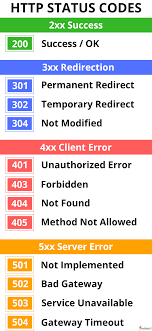

# Heading 1

## Heading 2

### Heading 3

#### Heading 4

<h1>Heading 1</h1>

<h2>Heading 2</h2>

<h3>Heading 3 </h3>

<h4>Heading</h4>

Plain Text

# <Heading1>

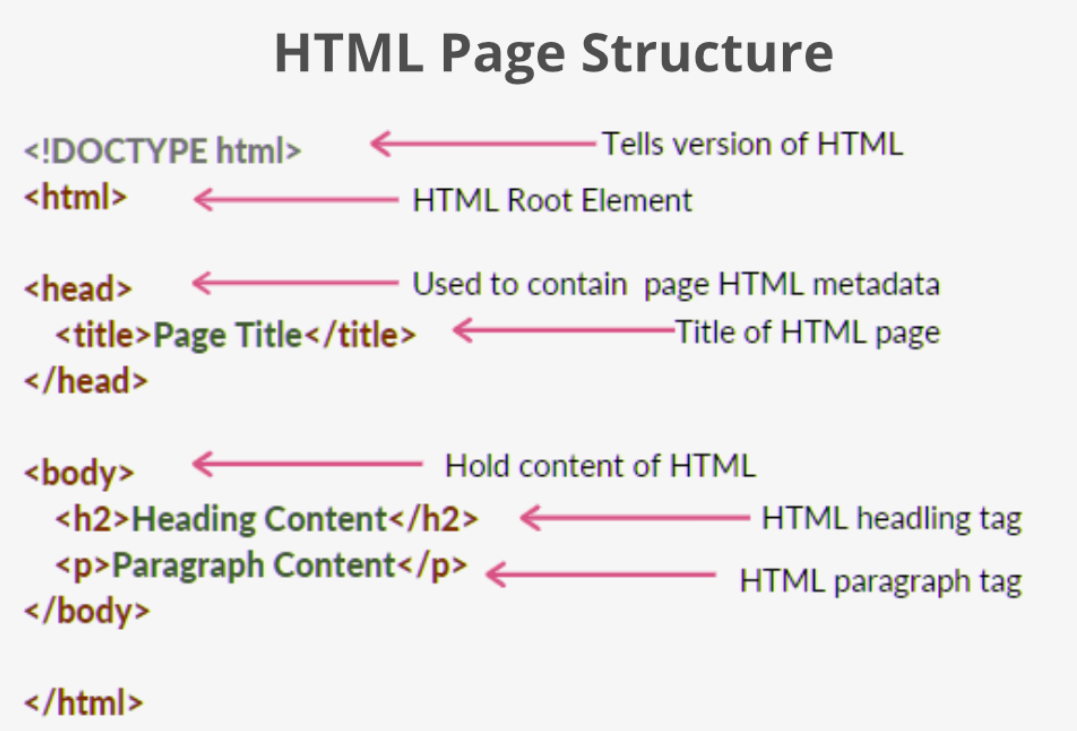

 ### Getting html code for data

In [4]:
data = response.content

### Create beatuiful soup for scrapping data

In [5]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(data)

### Get news heading and news links

In [6]:
headings = bs.find_all('h3', class_="entry-title td-module-title")
headings

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/pm-modi-taught-rioters-such-a-lesson-in-2002-no-one-dares-to-cause-riots-in-gujarat-amit-shah/" rel="bookmark" title="‘PM Modi taught rioters such a lesson in 2002, no one dares to cause riots in Gujarat’: Amit Shah lists PM Modi’s achievements at ‘Viksit Bharat Sankalp Yatra’">‘PM Modi taught rioters such a lesson in 2002, no one dares to cause riots in Gujarat’: Amit Shah lists PM Modi’s achievements at...</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/congress-announces-crowdfunding-campaign-after-crores-recovered-from-congress-mp-dhiraj-sahu-i-t-raids/" rel="bookmark" title="Congress announces crowdfunding campaign after cash haul of Rs 351 crores seized from Congress MP Dhiraj Sahu in I-T raids">Congress announces crowdfunding campaign after cash haul of Rs 351 crores seized from Congress MP Dhiraj Sahu in I-T raids</a></h3>,
 <h3 class="entry-title td-mod

In [7]:
headings[0]

<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/pm-modi-taught-rioters-such-a-lesson-in-2002-no-one-dares-to-cause-riots-in-gujarat-amit-shah/" rel="bookmark" title="‘PM Modi taught rioters such a lesson in 2002, no one dares to cause riots in Gujarat’: Amit Shah lists PM Modi’s achievements at ‘Viksit Bharat Sankalp Yatra’">‘PM Modi taught rioters such a lesson in 2002, no one dares to cause riots in Gujarat’: Amit Shah lists PM Modi’s achievements at...</a></h3>

In [8]:
headings[0].text

'‘PM Modi taught rioters such a lesson in 2002, no one dares to cause riots in Gujarat’: Amit Shah lists PM Modi’s achievements at...'

In [10]:
headings[0].find('a')

<a href="https://www.opindia.com/2023/12/pm-modi-taught-rioters-such-a-lesson-in-2002-no-one-dares-to-cause-riots-in-gujarat-amit-shah/" rel="bookmark" title="‘PM Modi taught rioters such a lesson in 2002, no one dares to cause riots in Gujarat’: Amit Shah lists PM Modi’s achievements at ‘Viksit Bharat Sankalp Yatra’">‘PM Modi taught rioters such a lesson in 2002, no one dares to cause riots in Gujarat’: Amit Shah lists PM Modi’s achievements at...</a>

In [11]:
headings[0].find('a').get('href')


'https://www.opindia.com/2023/12/pm-modi-taught-rioters-such-a-lesson-in-2002-no-one-dares-to-cause-riots-in-gujarat-amit-shah/'

In [12]:
len(headings)

113

### Create a function to get news headings and links

In [13]:
def get_news_headings_links(url):
    import requests
    response = requests.get(url)
    data = response.content
    from bs4 import BeautifulSoup
    bs = BeautifulSoup(data)
    # Get news headings and links
    headings = bs.find_all('h3', class_="entry-title td-module-title")
    title = []
    links = []
    for i in headings:
        h = i.text
        title.append(h)
        l = i.find('a').get('href')
        links.append(l)
    return title, links

In [14]:
url

'https://www.opindia.com/'

In [15]:
titles, links = get_news_headings_links(url)

In [16]:
titles[0:5]

['‘PM Modi taught rioters such a lesson in 2002, no one dares to cause riots in Gujarat’: Amit Shah lists PM Modi’s achievements at...',
 'Congress announces crowdfunding campaign after cash haul of Rs 351 crores seized from Congress MP Dhiraj Sahu in I-T raids',
 'PM Modi’s degree case: Gujarat court junks Kejriwal’s plea against nod to prosecute him in defamation complaint filed by Gujarat University',
 '‘We are committed to bringing UCC and implementing CAA’, says Union Home Minister Amit Shah',
 'Rakesh Tikait denies claims that farmer unions will protest to get Neelam Singh released, says ‘SKM, BKU have nothing to do with it’']

In [17]:
links[0:5]

['https://www.opindia.com/2023/12/pm-modi-taught-rioters-such-a-lesson-in-2002-no-one-dares-to-cause-riots-in-gujarat-amit-shah/',
 'https://www.opindia.com/2023/12/congress-announces-crowdfunding-campaign-after-crores-recovered-from-congress-mp-dhiraj-sahu-i-t-raids/',
 'https://www.opindia.com/2023/12/gujarat-court-junks-kejriwals-plea-against-prosecution-in-defamation-case-filed-by-gujarat-university/',
 'https://www.opindia.com/2023/12/we-are-committed-to-bringing-ucc-and-implementing-caa-says-home-minister-amit-shah/',
 'https://www.opindia.com/2023/12/rakesh-tikait-denies-claims-neelam-singh-released-says-skm-or-bku-has-nothing-to-do-with-it/']

In [18]:
url2 = links[0]
url2

'https://www.opindia.com/2023/12/pm-modi-taught-rioters-such-a-lesson-in-2002-no-one-dares-to-cause-riots-in-gujarat-amit-shah/'

In [19]:
response2 = requests.get(url2)
response2

<Response [200]>

In [20]:
data2 = response2.content
bs2 = BeautifulSoup(data2)

In [21]:
date = bs2.find('time', class_="entry-date updated td-module-date")
date

<time class="entry-date updated td-module-date" datetime="2023-12-16T18:10:33+05:30">16 December, 2023 </time>

In [ ]:
data2 = response2.content
bs2 = BeautifulSoup(data2)

In [22]:
date.text

'16 December, 2023 '

In [24]:
content_tags = bs2.find_all('p')
content_tags

[<p>Amit Shah listed out the major achievements of the Modi government in the last nine-and-a-half years and credited the Prime Minister for abrogating Article 370 “in a jiffy”</p>,
 <p>On 16th December (Saturday), Union Home Minister Amit Shah asserted that Prime Minister Narendra Modi taught such a lesson to rioters in Gujarat in 2002 that no one has dared to cause riots again in the state to date. He made the remarks while addressing the Viksit Bharat Sankalp Yatra in Sanand, Gujarat’s Ahmedabad district. </p>,
 <p>Addressing the gathering in Gujarati, Home Minister Shah <a href="https://indianexpress.com/article/cities/ahmedabad/pm-modi-amit-shah-gujarat-2002-riots-visit-9070847/" rel="noreferrer noopener" target="_blank">said</a>, “In 2002, there were riots and thereafter Modi saheb taught a lesson to not repeat the act. Have there been riots thereafter? The rioters were taught such a lesson in 2002 that to date no one dares to cause riots in Gujarat.”</p>,
 <p dir="ltr" lang="gu"

In [25]:
content_tags[0].text

'Amit Shah listed out the major achievements of the Modi government in the last nine-and-a-half years and credited the Prime Minister for abrogating Article 370 “in a jiffy”'

In [26]:
article = ""
for i in content_tags:
    article = article + i.text

In [27]:
print(article)

Amit Shah listed out the major achievements of the Modi government in the last nine-and-a-half years and credited the Prime Minister for abrogating Article 370 “in a jiffy”On 16th December (Saturday), Union Home Minister Amit Shah asserted that Prime Minister Narendra Modi taught such a lesson to rioters in Gujarat in 2002 that no one has dared to cause riots again in the state to date. He made the remarks while addressing the Viksit Bharat Sankalp Yatra in Sanand, Gujarat’s Ahmedabad district. Addressing the gathering in Gujarati, Home Minister Shah said, “In 2002, there were riots and thereafter Modi saheb taught a lesson to not repeat the act. Have there been riots thereafter? The rioters were taught such a lesson in 2002 that to date no one dares to cause riots in Gujarat.”ચાંગોદર, સાણંદ (ગુજરાત) ખાતે 'વિકસિત ભારત સંકલ્પ યાત્રા'માં જનતા સાથે સંવાદ… https://t.co/W5WTKGanLHHe also listed out the major achievements of the Modi government in the last nine-and-a-half years and credited 

### Getting news article time and article for a specific link

In [28]:
def get_news_date_article(url2):    
    response2 = requests.get(url2)
    data2 = response2.content
    bs2 = BeautifulSoup(data2)
    # Getting Date
    date_tag = bs2.find('time', class_="entry-date updated td-module-date")
    date = date_tag.text
    # Get article
    content_tags = bs2.find_all('p')
    article = ""
    for i in content_tags:
        article = article + i.text
    return date, article

In [29]:
def get_all_news_dates_articles(links):
    news = []
    dates = []
    for i in links:
        date, article = get_news_date_article(i)
        dates.append(date)
        news.append(article)
    return dates, news

In [30]:
url2

'https://www.opindia.com/2023/12/pm-modi-taught-rioters-such-a-lesson-in-2002-no-one-dares-to-cause-riots-in-gujarat-amit-shah/'

In [31]:
date, article = get_news_date_article(url2)

In [33]:
date

'16 December, 2023 '

In [34]:
article

"Amit Shah listed out the major achievements of the Modi government in the last nine-and-a-half years and credited the Prime Minister for abrogating Article 370 “in a jiffy”On 16th December (Saturday), Union Home Minister Amit Shah asserted that Prime Minister Narendra Modi taught such a lesson to rioters in Gujarat in 2002 that no one has dared to cause riots again in the state to date. He made the remarks while addressing the Viksit Bharat Sankalp Yatra in Sanand, Gujarat’s Ahmedabad district.\xa0Addressing the gathering in Gujarati, Home Minister Shah said, “In 2002, there were riots and thereafter Modi saheb taught a lesson to not repeat the act. Have there been riots thereafter? The rioters were taught such a lesson in 2002 that to date no one dares to cause riots in Gujarat.”ચાંગોદર, સાણંદ (ગુજરાત) ખાતે 'વિકસિત ભારત સંકલ્પ યાત્રા'માં જનતા સાથે સંવાદ… https://t.co/W5WTKGanLHHe also listed out the major achievements of the Modi government in the last nine-and-a-half years and credi

### Creating a final function to save all news details in a dataframe

In [35]:
def get_news_dataframe(url):
    # Get news headings and links
    headings, links = get_news_headings_links(url)
    # Get the news and dates for each link
    dates, news  = get_all_news_dates_articles(links)
    dct = {'Date':dates, 
           'Heading':headings,
           'Link': links,
           'Article':news}
    # Save above in dataframe
    import pandas as pd
    df = pd.DataFrame(dct)
    return df

In [37]:
url

'https://www.opindia.com/'

In [38]:
df_news = get_news_dataframe(url)

In [39]:
df_news

,Date,Heading,Link,Article
0,"16 December, 2023","‘PM Modi taught rioters such a lesson in 2002,...",https://www.opindia.com/2023/12/pm-modi-taught...,Amit Shah listed out the major achievements of...
1,"16 December, 2023",Congress announces crowdfunding campaign after...,https://www.opindia.com/2023/12/congress-annou...,"""The Indian National Congress is proud to anno..."
2,"16 December, 2023",PM Modi’s degree case: Gujarat court junks Kej...,https://www.opindia.com/2023/12/gujarat-court-...,The court of additional chief metropolitan mag...
3,"15 December, 2023",‘We are committed to bringing UCC and implemen...,https://www.opindia.com/2023/12/we-are-committ...,"Amit Shah said, ""Congress party kept it aside ..."
4,"15 December, 2023",Rakesh Tikait denies claims that farmer unions...,https://www.opindia.com/2023/12/rakesh-tikait-...,"Rakesh Tikait posted from his X handle, ""The i..."
...,...,...,...,...
108,"15 December, 2023",Madhya Pradesh: Houses of three Congress MLA A...,https://www.opindia.com/2023/12/mp-houses-of-t...,Supporters of Congress MLA Arif Masood targete...
109,"15 December, 2023",Stray dog attack is municipality’s fault: Odis...,https://www.opindia.com/2023/12/odisha-hc-asks...,The order was issued by the High Court during ...
110,"15 December, 2023",‘Need preachers who stand up for our values’: ...,https://www.opindia.com/2023/12/germany-to-sto...,"""We need religious leaders who speak our langu..."
111,"15 December, 2023",Karnataka: Congress MLA proposes to rename Mys...,https://www.opindia.com/2023/12/karnataka-cong...,Abbayya who is MLA from Hubballi-Dharwad (East...


In [40]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     113 non-null    object
 1   Heading  113 non-null    object
 2   Link     113 non-null    object
 3   Article  113 non-null    object
dtypes: object(4)
memory usage: 3.7+ KB


### Save all above in news.csv

In [41]:
df_news.to_csv('News.csv', index=False)